## Importar librería de pandas 

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Carga de archivos CSV

In [24]:
Datos_P = pd.read_csv(r"C:\Users\User\Desktop\Logitech\Datos_Cobertura Movil.csv", sep=';', encoding="utf-8")

## Exploración de base de datos

In [25]:
print("\n************************************************************")
print("***************** Exploración base de datos ******************")
#
print("***** Primeras filas:\n", Datos_P.head()) # Ver las primeras 5 filas
print("***** Últimas filas:\n", Datos_P.tail()) # Ver las últimas 5 filas
print("***** Número de filas y columnas:\n", Datos_P.shape) # Saber cuantas filas y columnas tiene
print("***** Nombres de las columnas:\n", Datos_P.columns) # Ver los nombres de las columnas
print("***** Tipificación de los datos:\n", Datos_P.info()) # Resumen del tipo de datos



************************************************************
***************** Exploración base de datos ******************
***** Primeras filas:
    ANNO  TRIMESTRE  ID_DEPARTAMENTO DEPARTAMENTO  ID_MUNICIPIO MUNUCIPIO  \
0  2023          1                5    ANTIOQUIA          5001  MEDELLÍN   
1  2023          1                5    ANTIOQUIA          5001  MEDELLÍN   
2  2023          1                5    ANTIOQUIA          5001  MEDELLÍN   
3  2023          1                5    ANTIOQUIA          5001  MEDELLÍN   
4  2023          1                5    ANTIOQUIA          5001  MEDELLÍN   

   ID_CPOB                     CPOB    AREA_CPOB  ID_TECNOLOGIA TECNOLOGIA  \
0  5001000      MEDELLÍN - CABECERA  121,3510001              2         2G   
1  5001009                ALTAVISTA    0,0897256              2         2G   
2  5001010              AGUAS FRÍAS    0,7393519              2         2G   
3  5001013  SAN JOSÉ DEL MANZANILLO    0,3447936              2         2G   
4  50

## Limpieza y tratamiento de los datos

In [26]:
print("\n*********************************************************************")
print("***************** Limpieza y tratamiento de los datos *****************")
#
# Revisar si hay valores faltantes
print("\n Cantidad de valores faltantes en la base de datos:")
print(Datos_P.isnull().sum())
# Eliminar ID_DEPARTAMENTO - ID_MUNICIPO - ID_CPOB
Datos_P.drop(columns=['ID_DEPARTAMENTO', "ID_MUNICIPIO", "ID_CPOB"], inplace=True)
# Lista de columnas que necesitas convertir de object a float
columnas = ['AREA_COB_CLARO', 'AREA_COB_MOVISTAR', 'AREA_COB_TIGO', 'AREA_COB_WOM']
# Reemplazar la coma por punto y convertir a float
for col in columnas:
    Datos_P[col] = Datos_P[col].str.replace(',', '.').astype(float) 
    # str.replace(',', '.') convierte "0,1234" en "0.1234"
    # astype(float) cambia el tipo de datos de object a float
#    
# Guardar el archivo sobrescribiéndolo
Datos_P.to_csv(r"C:\Users\User\Desktop\Logitech\Datos_Cobertura Movil2.csv", index=False, encoding="utf-8")



*********************************************************************
***************** Limpieza y tratamiento de los datos *****************

 Cantidad de valores faltantes en la base de datos:
ANNO                 0
TRIMESTRE            0
ID_DEPARTAMENTO      0
DEPARTAMENTO         0
ID_MUNICIPIO         0
MUNUCIPIO            0
ID_CPOB              0
CPOB                 0
AREA_CPOB            0
ID_TECNOLOGIA        0
TECNOLOGIA           0
NIVEL_SENAL          0
AREA_COB_CLARO       0
AREA_COB_MOVISTAR    0
AREA_COB_TIGO        0
AREA_COB_WOM         0
dtype: int64


## Post-limpieza y tratamiento de los datos

In [27]:
print("\n**************************************************************************")
print("***************** Post-limpieza y tratamiento de los datos *****************")
print("\nBase de datos limpia:\n")
#print(Datos_P.head()) Eliminar ?
#print(Datos_P.tail()) Eliminar ?
print(Datos_P.shape) 
# Verificar la información que quedó
print("Modificación de la base de datos al eliminar ID_DEPARTAMENTO - ID_MUNICIPO - ID_CPOB:")
print(Datos_P.info())
# Volver a colocar los nombres de las columnas
print("Columnas que quedan:")
print(Datos_P.columns)


**************************************************************************
***************** Post-limpieza y tratamiento de los datos *****************

Base de datos limpia:

(380262, 13)
Modificación de la base de datos al eliminar ID_DEPARTAMENTO - ID_MUNICIPO - ID_CPOB:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380262 entries, 0 to 380261
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ANNO               380262 non-null  int64  
 1   TRIMESTRE          380262 non-null  int64  
 2   DEPARTAMENTO       380262 non-null  object 
 3   MUNUCIPIO          380262 non-null  object 
 4   CPOB               380262 non-null  object 
 5   AREA_CPOB          380262 non-null  object 
 6   ID_TECNOLOGIA      380262 non-null  int64  
 7   TECNOLOGIA         380262 non-null  object 
 8   NIVEL_SENAL        380262 non-null  int64  
 9   AREA_COB_CLARO     380262 non-null  float64
 10  AREA_COB_MOVISTAR  3

## Análisis estadísticos

In [28]:
print("\n*******************************************************")
print("***************** Análisis estadísticos *****************")
# Estadísticas descriptivas numéricas
print(Datos_P[["NIVEL_SENAL", "AREA_COB_CLARO", "AREA_COB_MOVISTAR", "AREA_COB_TIGO", "AREA_COB_WOM"]].describe()) 
# Frecuencias absolutas de las variables nominales (cuántas veces aparece cada categoría)
# .value_counts cuenta cuántas veces aparece cada valor en la columna
frecuencias_0 = Datos_P['ANNO'].value_counts()
frecuencias_1 = Datos_P['TRIMESTRE'].value_counts()
frecuencias_2 = Datos_P['DEPARTAMENTO'].value_counts()
frecuencias_10 = Datos_P['TECNOLOGIA'].value_counts()
# Frecuencia relativa (porcentajes)
# .value_counts cuenta cuántas veces aparece cada valor en la columna
# con el parámetro normalize=True, en lugar de entregar los conteos absolutos, entrega proporciones relativas
# (es decir, frecuencias relativas entre 0 y 1), por ejemplo: 2023= 0.664 y 2024 = 0.336
# * 100 Multiplica esas proporciones por 100 para convertirlas en porcentajes.
porcentajes_0 = Datos_P['ANNO'].value_counts(normalize=True) * 100
porcentajes_1 = Datos_P['TRIMESTRE'].value_counts(normalize=True) * 100
porcentajes_2 = Datos_P['DEPARTAMENTO'].value_counts(normalize=True) * 100
porcentajes_10 = Datos_P['TECNOLOGIA'].value_counts(normalize=True) * 100
# Mostrar resultados
print("***** Frecuencias absolutas:")
print("Años: ", frecuencias_0)
print("Trimestres: ", frecuencias_1)
print("Departamentos: ",frecuencias_2)
print("Tecnología: ",frecuencias_10)
# Mostrar resultados en porcentajes
print("***** Porcentajes:")
print("Proporción años: ",porcentajes_0.round(2))  # Round(2) Redondea a 2 decimales
print("Proporción trimestres: ",porcentajes_1.round(2))
print("Proporción departamentos: ", porcentajes_2.round(2))
print("Proporción tecnologías: ", porcentajes_10.round(2))


# Lista de variables nominales
variables_nominales = ['ANNO', 'TRIMESTRE', 'DEPARTAMENTO', 'CPOB', 'TECNOLOGIA']  
# Para cada variable, generar tabla con Frecuencia y Porcentaje
for var in variables_nominales:
    if var in Datos_P.columns:
        tabla = pd.DataFrame({
            'Frecuencia': Datos_P[var].value_counts(),'Porcentaje (%)': Datos_P[var].value_counts(normalize=True) 
            * 100}).round(2)

        print(f"\n--- {var} ---")
        print(tabla)



*******************************************************
***************** Análisis estadísticos *****************
         NIVEL_SENAL  AREA_COB_CLARO  AREA_COB_MOVISTAR  AREA_COB_TIGO  \
count  380262.000000   380262.000000      380262.000000  380262.000000   
mean        2.408813        0.242042           0.205846       0.141309   
std         1.165472        2.365921           2.071655       1.938483   
min         0.000000        0.000000           0.000000       0.000000   
25%         1.000000        0.000000           0.000000       0.000000   
50%         2.000000        0.016294           0.000000       0.000000   
75%         3.000000        0.089154           0.037986       0.013784   
max         5.000000      246.884453         210.000485     295.677327   

        AREA_COB_WOM  
count  380262.000000  
mean        0.122310  
std         2.202366  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max       379.395067  
***** Frecu

## Análisis y comparaciones

In [29]:
print("\n************************************************************")
print("***************** Análisis y comparaciones *****************")

# Comparación de cobertura entre los operadores por departamento
print("Estadística bivariada")
Tabla1_bivariada= Datos_P.groupby("DEPARTAMENTO")[["NIVEL_SENAL", "AREA_COB_CLARO", "AREA_COB_MOVISTAR", "AREA_COB_TIGO", "AREA_COB_WOM"]].describe()
print(Tabla1_bivariada)
Tabla1_bivariada.to_excel("resumen_por_departamento.xlsx")

# Comparación de cobertura entre los operadores por año
Tabla3_bivariada= Datos_P.groupby("ANNO")[["NIVEL_SENAL", "AREA_COB_CLARO", "AREA_COB_MOVISTAR", "AREA_COB_TIGO", "AREA_COB_WOM"]].describe()
print(Tabla3_bivariada)
Tabla3_bivariada.to_excel("resumen_por_año.xlsx")

# Comparación de tecnología entre los departamentos
Tabla4_bivariada= Datos_P.groupby("DEPARTAMENTO")[["TECNOLOGIA"]].value_counts()
print(Tabla4_bivariada)
Tabla5_bivariada= Datos_P.groupby("DEPARTAMENTO")[["TECNOLOGIA"]].value_counts(normalize=True) * 100
print(Tabla5_bivariada)
Tabla5_bivariada.to_excel("resumen_por_departamento_año_Vstecnología.xlsx")

# Comparación de tecnología entre los departamentos por año
Tabla6_bivariada = (
    Datos_P
    .groupby(["ANNO", "DEPARTAMENTO"])["TECNOLOGIA"]
    .value_counts(normalize=True)  # frecuencia relativa
    .mul(100)                      # convertir a porcentaje
    .unstack(fill_value=0))        # columnas por tipo de tecnología

print(Tabla6_bivariada)
Tabla6_bivariada.to_excel("resumen_por_departamento_año_Vs_tecnología.xlsx")

# Tecnología Vs operador
Tabla7_bivariada= Datos_P.groupby("TECNOLOGIA")[["AREA_COB_CLARO", "AREA_COB_MOVISTAR", "AREA_COB_TIGO", "AREA_COB_WOM"]].describe()
print(Tabla7_bivariada)
Tabla7_bivariada.to_excel("resumen_por_tecnología_operador.xlsx")

# Área de cobertura total por operadores
Sumatoria_tigo= sum(Datos_P["AREA_COB_TIGO"])
print(f"Sumatoria tigo: {Sumatoria_tigo}")
Sumatoria_claro= sum(Datos_P["AREA_COB_CLARO"])
print(f"Sumatoria claro: {Sumatoria_claro}")
Sumatoria_movistar= sum(Datos_P["AREA_COB_MOVISTAR"])
print(f"Sumatoria movistar: {Sumatoria_movistar}")
Sumatoria_wom= sum(Datos_P["AREA_COB_WOM"])
print(f"Sumatoria wom: {Sumatoria_wom}")
Sumatoria_señal= sum(Datos_P["NIVEL_SENAL"])
print(f"Sumatoria total señal: {Sumatoria_señal}")

# Área de cobertura total por operadores
Cobertura_total= Datos_P.groupby("TECNOLOGIA")[["AREA_COB_CLARO", "AREA_COB_MOVISTAR", "AREA_COB_TIGO", "AREA_COB_WOM"]].sum()
print(f"Cobertura total por operador: {Cobertura_total}")
Cobertura_total.to_excel("Cobertura total por operador.xlsx")

# Comparación de nivel de señal por tecnología y departamento
Tabla8_bivariada = (
    Datos_P
    .groupby(["DEPARTAMENTO", "TECNOLOGIA"])["NIVEL_SENAL"]
    .sum()  # Suma 
    .unstack(fill_value=0))        # columnas por tipo de tecnología

print(Tabla8_bivariada)
Tabla8_bivariada.to_excel("resumen_nivel de señal por tecnología y departamento.xlsx")




************************************************************
***************** Análisis y comparaciones *****************
Estadística bivariada
                   NIVEL_SENAL                                               \
                         count      mean       std  min  25%  50%  75%  max   
DEPARTAMENTO                                                                  
 SAN ANDRÉS              768.0  2.783854  1.243560  1.0  2.0  3.0  4.0  5.0   
AMAZONAS                1971.0  2.337900  1.190265  0.0  1.0  2.0  3.0  5.0   
ANTIOQUIA              40925.0  2.498742  1.187541  0.0  1.0  2.0  3.0  5.0   
ARAUCA                  2484.0  2.208132  1.231777  0.0  1.0  2.0  3.0  5.0   
ATLÁNTICO               5676.0  2.607118  1.249484  1.0  2.0  3.0  4.0  5.0   
BOGOTÁ. D.C.             509.0  2.683694  1.221586  1.0  2.0  3.0  4.0  5.0   
BOLÍVAR                21279.0  2.189906  1.122315  0.0  1.0  2.0  3.0  5.0   
BOYACÁ                 14260.0  2.607854  1.156070  0.0  2.0  3.0

## Visualización

In [30]:
print("\n*************************************************")
print("***************** Visualización *****************")
# Configuración general de estilo
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


*************************************************
***************** Visualización *****************


1. Comparación de cobertura entre operadores por departamento

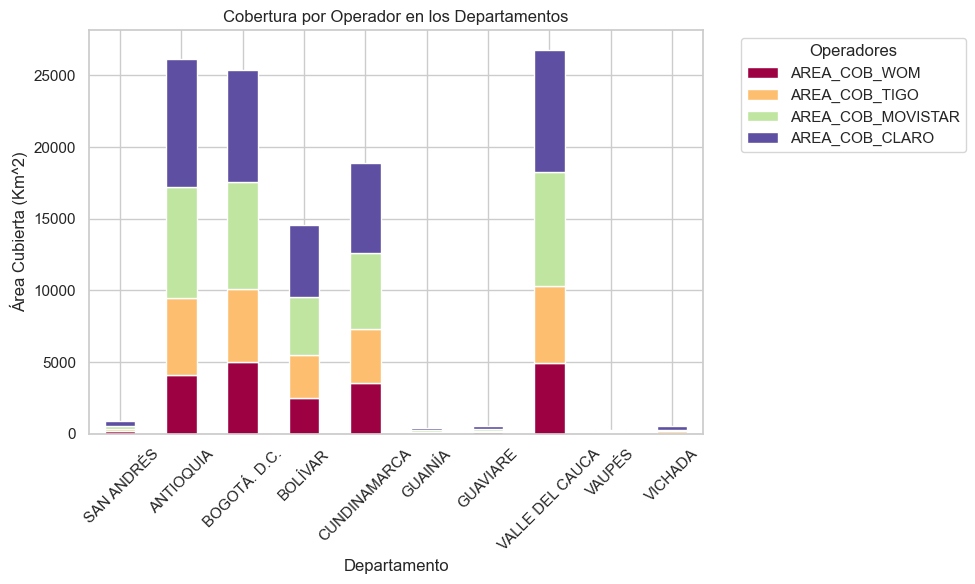

In [31]:
# Crear la columna Cobertura_Total - Suma las áreas de los operadores
Datos_P["Cobertura_Total"] = Datos_P[["AREA_COB_CLARO", "AREA_COB_MOVISTAR", "AREA_COB_TIGO", "AREA_COB_WOM"]].sum(axis=1)
# Cobertura total por departamento
cobertura_dept = Datos_P.groupby("DEPARTAMENTO")["Cobertura_Total"].sum().sort_values()
# Mejores 5 y peores 5
mejores5_depts = cobertura_dept.tail(5)
peores5_depts = cobertura_dept.head(5)
# Filtrar los datos para incluir solo los departamentos anteriores
cobertura_dept_selec = Datos_P[Datos_P["DEPARTAMENTO"].isin(mejores5_depts.index.union(peores5_depts.index))]
# Calcular la cobertura total por operador en los departamentos seleccionados
cobertura_por_operador = cobertura_dept_selec.groupby("DEPARTAMENTO")[["AREA_COB_CLARO", "AREA_COB_MOVISTAR", "AREA_COB_TIGO", "AREA_COB_WOM"]].sum()
# Reorganizar  en orden ascendente según su suma total
cobertura_por_operador = cobertura_por_operador.loc[:, cobertura_por_operador.sum().sort_values().index]
# Crear el gráfico 
cobertura_por_operador.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="Spectral")
plt.title("Cobertura por Operador en los Departamentos")
plt.ylabel("Área Cubierta (Km^2)")
plt.xlabel("Departamento")
plt.xticks(rotation=45)
plt.legend(title="Operadores", bbox_to_anchor=(1.05, 1), loc='upper left') # bbox_to_anchor y loc - Ubicación legend
plt.tight_layout()
plt.show()

2.  Comparación de tecnología entre departamentos por año

C:\Users\User\AppData\Local\Temp\ipykernel_11872\789677421.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Datos_2024["AREA_TOTAL"] = Datos_2024[["AREA_COB_CLARO", "AREA_COB_MOVISTAR", "AREA_COB_TIGO", "AREA_COB_WOM"]].sum(axis=1)
C:\Users\User\AppData\Local\Temp\ipykernel_11872\789677421.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Datos_2023["AREA_TOTAL"] = Datos_2023[["AREA_COB_CLARO", "AREA_COB_MOVISTAR", "AREA_COB_TIGO", "AREA_COB_WOM"]].sum(axis=1)


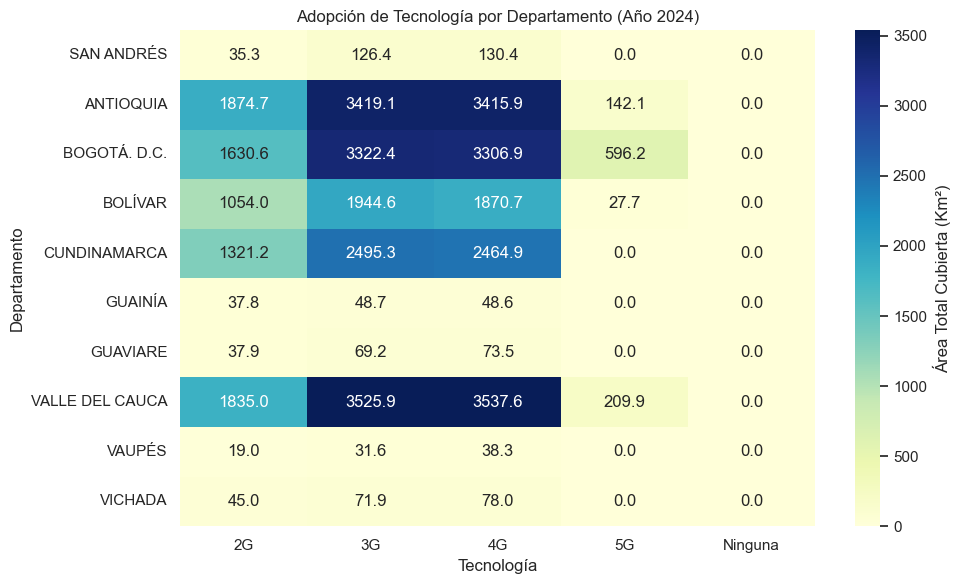

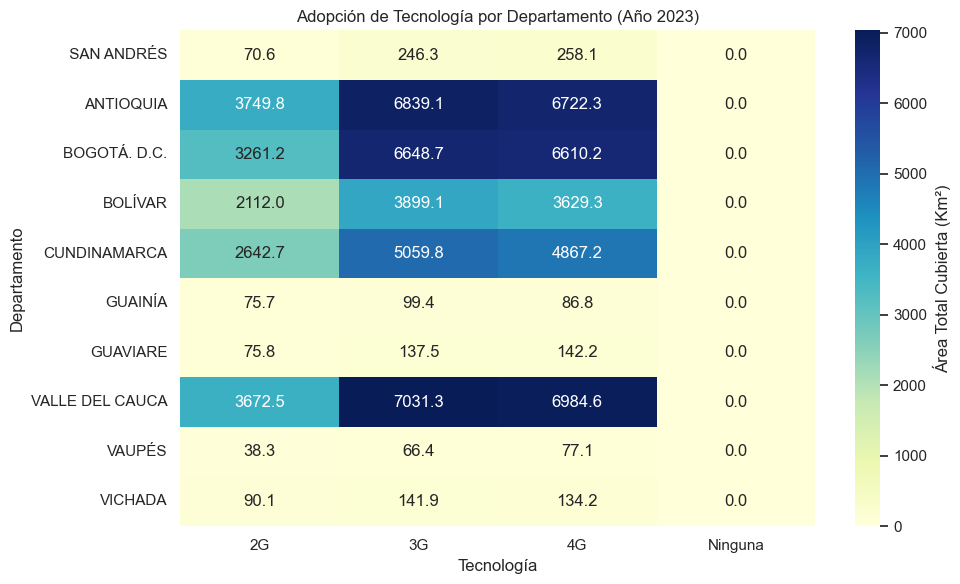

In [32]:
# Filtrar los datos para el año 2023 y 2024
Datos_2024 = Datos_P[Datos_P["ANNO"] == 2024]
Datos_2023 = Datos_P[Datos_P["ANNO"] == 2023]
# Calcular área total de cobertura por  operador para el 2024 y 2023
Datos_2024["AREA_TOTAL"] = Datos_2024[["AREA_COB_CLARO", "AREA_COB_MOVISTAR", "AREA_COB_TIGO", "AREA_COB_WOM"]].sum(axis=1)
Datos_2023["AREA_TOTAL"] = Datos_2023[["AREA_COB_CLARO", "AREA_COB_MOVISTAR", "AREA_COB_TIGO", "AREA_COB_WOM"]].sum(axis=1)
# Agrupar por departamento - tecnología y sumar las áreas totales
cobertura_tec_2024 = Datos_2024.groupby(["DEPARTAMENTO", "TECNOLOGIA"])["AREA_TOTAL"].sum().unstack(fill_value=0)
cobertura_tec_2023 = Datos_2023.groupby(["DEPARTAMENTO", "TECNOLOGIA"])["AREA_TOTAL"].sum().unstack(fill_value=0)
# Seleccionar los departamentos con mayor y menor cobertura total para el año 2024 y 2023
# ------------2024------------
indices_2024 = cobertura_tec_2024.sum(axis=1).nlargest(5).index.union(cobertura_tec_2024.sum(axis=1).nsmallest(5).index)
cobertura_tec_2024_selec = cobertura_tec_2024.loc[indices_2024]
# ------------2023------------
indices_2023 = cobertura_tec_2023.sum(axis=1).nlargest(5).index.union(cobertura_tec_2023.sum(axis=1).nsmallest(5).index)
cobertura_tec_2023_selec = cobertura_tec_2023.loc[indices_2023]
# Heatmap para el año 2024
# cbar_kws para personalizar la barra de color y fmt (format string) para mostrar decimales
sns.heatmap(cobertura_tec_2024_selec, cmap="YlGnBu", annot=True, fmt=".1f", cbar_kws={'label': 'Área Total Cubierta (Km²)'})
plt.title("Adopción de Tecnología por Departamento (Año 2024)")
plt.xlabel("Tecnología")
plt.ylabel("Departamento")
plt.tight_layout()
plt.show()
# Heatmap para el año 2024
sns.heatmap(cobertura_tec_2023_selec, cmap="YlGnBu", annot=True, fmt=".1f", cbar_kws={'label': 'Área Total Cubierta (Km²)'})
plt.title("Adopción de Tecnología por Departamento (Año 2023)")
plt.xlabel("Tecnología")
plt.ylabel("Departamento")
plt.tight_layout()
plt.show()

3. Tecnología vs Operador

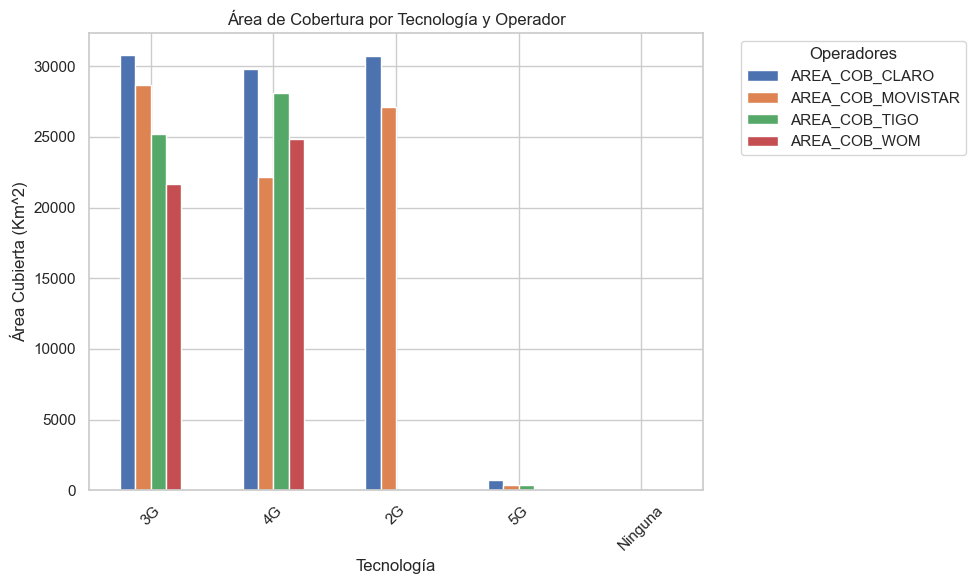

In [33]:
# Calcular área total de cobertura por tecnología y operador
tecno_operador = Datos_P.groupby("TECNOLOGIA")[["AREA_COB_CLARO", "AREA_COB_MOVISTAR", "AREA_COB_TIGO", "AREA_COB_WOM"]].sum()
# Calcular la suma total del área cubierta por tecnología
tecno_operador["TOTAL_AREA"] = tecno_operador.sum(axis=1)
# Seleccionar las 5 tecnologías con mayor y menor área de cobertura
mejores5_tecno_operador = tecno_operador.nlargest(5, "TOTAL_AREA")
peores5_tecno_operador = tecno_operador.nsmallest(5, "TOTAL_AREA")
# Eliminar duplicados y unir
tecno_operador_selec = pd.concat([mejores5_tecno_operador, peores5_tecno_operador]).drop_duplicates()
# Eliminar la columna TOTAL_AREA para el gráfico
tecno_operador_selec = tecno_operador_selec.drop(columns=["TOTAL_AREA"])
# Gráfico de barras agrupadas
tecno_operador_selec.plot(kind="bar", stacked=False, figsize=(10, 6))
plt.title("Área de Cobertura por Tecnología y Operador")
plt.ylabel("Área Cubierta (Km^2)")
plt.xlabel("Tecnología")
plt.xticks(rotation=45)
plt.legend(title="Operadores", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


4. Comparación de nivel de señal por tecnología y departamento

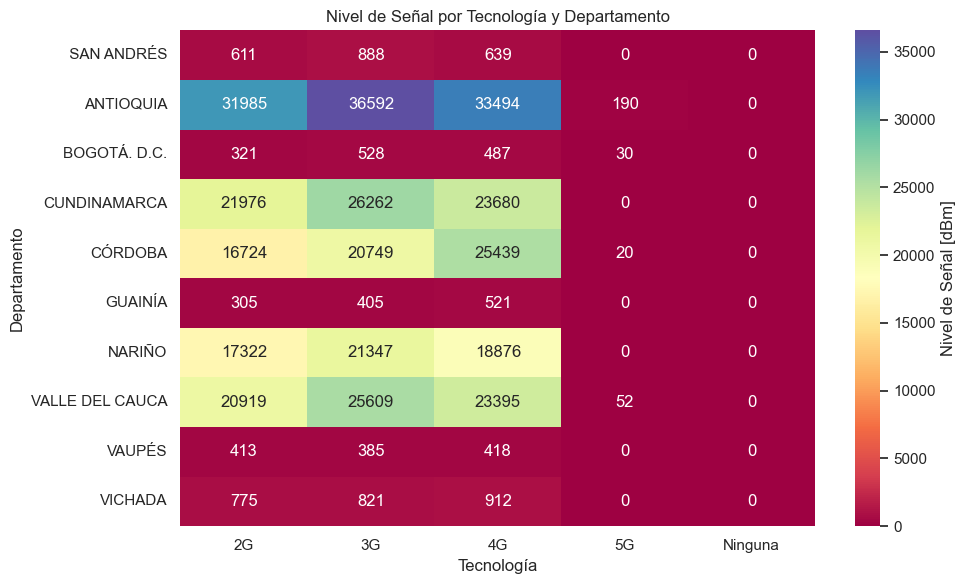

In [34]:
# Agrupar el departamento y la tecnología según el nivel de señal
senal_tecno_dpto = Datos_P.groupby(["DEPARTAMENTO", "TECNOLOGIA"])["NIVEL_SENAL"].sum().unstack(fill_value=0)
# Seleccionar las 5 mejores y peores niveles de señal
mejores5_senal = senal_tecno_dpto.sum(axis=1).nlargest(5)
peores5_senal = senal_tecno_dpto.sum(axis=1).nsmallest(5)
# Filtrar solo las anterires
senal_tecno_dpto_selec = senal_tecno_dpto.loc[mejores5_senal.index.union(peores5_senal.index)]
# Gráfico Heatmap
sns.heatmap(senal_tecno_dpto_selec, cmap="Spectral", annot=True, fmt=".0f", cbar_kws={'label': 'Nivel de Señal [dBm]'})
plt.title("Nivel de Señal por Tecnología y Departamento")
plt.xlabel("Tecnología")
plt.ylabel("Departamento")
plt.tight_layout()
plt.show()

5. Área de cobertura total por operadores

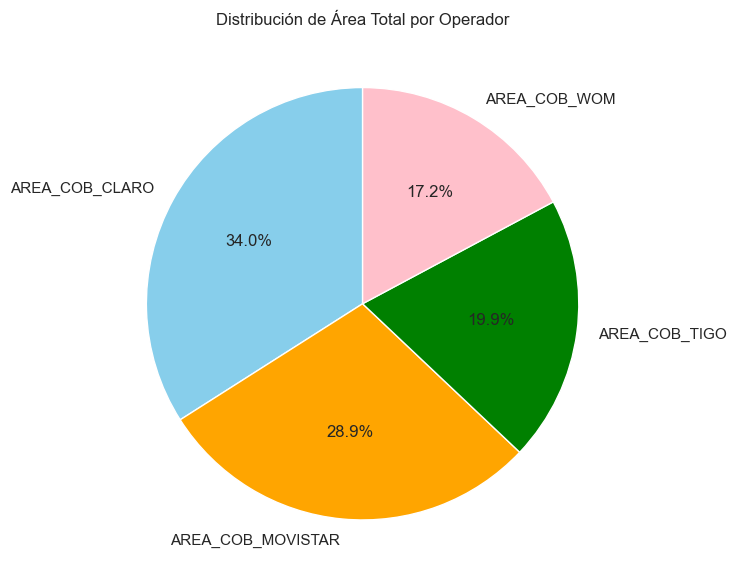

In [ ]:
# Calcular área de cobertura total para cada opeador
cobertura_operador = Datos_P[["AREA_COB_CLARO", "AREA_COB_MOVISTAR", "AREA_COB_TIGO", "AREA_COB_WOM"]].sum()
# Gráfico circular
cobertura_operador.plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=["skyblue", "orange", "green", "pink"])
plt.title("Distribución de Área Total por Operador")
plt.ylabel("") 
plt.tight_layout()
plt.show()

